In [1]:
from PIL import Image, ImageDraw
from math import sin, cos, pi

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
def sign(x): # знак числа
        if x > 0:
                return 1
        if x < 0:
                return -1
        return 0

In [3]:
def line(x1, y1, x2, y2):  # рисуем линию из точки (x1,y1) в точку (x2,y2)
        dX = abs(x2 - x1)
        dY = abs(y2 - y1)
        if dX >= dY: # если наклон по X больше Y, то X меняем на 1 и смотрим Y
            if x1 > x2: # если точка 2 правее точки 1, меняем их местами
                    x1, x2 = x2, x1
                    y1, y2 = y2, y1
            err = 0 # накапливаемая "ошибка"
            dErr = dY
            y = y1
            dirY = sign(y2 - y1)
            for x in range(x1, x2 + 1):
                    draw.point((x,y),(0,0,0))
                    err += dErr
                    if err + err >= dX:
                            y += dirY
                            err -= dX
        else: # если наклон по Y больше, то, наоборот, Y меняем на 1 и смотрим X
            if y1 > y2: # если точка 2 ближе точки 1, меняем их местами
                    x1, x2 = x2, x1
                    y1, y2 = y2, y1
            err = 0 # накапливаемая "ошибка"
            dErr = dX
            x = x1
            dirX = sign(x2 - x1)
            for y in range(y1, y2 + 1):
                    draw.point((x,y),(0,0,0))
                    err += dErr
                    if err + err >= dY:
                            x += dirX
                            err -= dY

In [4]:
class Painter:
    def __init__(self, x = 0, y = 0, angle = 0):
        self.x = x
        self.y = y
        self.angle = angle
        
    def forward(self, distance):
        dest_x = self.x + round(cos(self.angle) * distance)
        dest_y = self.y + round(sin(self.angle) * distance)
        line(self.x, self.y, dest_x, dest_y)
        self.x, self.y = dest_x, dest_y
        
    def right(self, angle):
        self.angle += angle

In [5]:
def fractal(size, depth, draw):
    if depth == 1:
        draw.forward(size)
    else:
        fractal(size // 3, depth - 1, draw)
        draw.right(-pi/3)
        fractal(size // 3, depth - 1, draw)
        draw.right(2*pi/3)
        fractal(size // 3, depth - 1, draw)
        draw.right(-pi/3)
        fractal(size // 3, depth - 1, draw)

In [6]:
def fractal(size, depth, draw):
    if depth == 1:
        draw.forward(size)
    else:
        fractal(size // 3, depth - 1, draw)
        draw.right(pi/2)
        fractal(size // 3, depth - 1, draw)
        draw.right(-pi/2)
        fractal(size // 3, depth - 1, draw)

In [37]:
image = Image.open("roof_half.jpg")
draw = ImageDraw.Draw(image)
width  = image.size[0] 
height = image.size[1]
pix = image.load()

for x in range(width):
    for y in range(height):
        draw.point((x, y), (255, 255, 255))

rafael = Painter(360, 270)

#for i in range(4):
#    rafael.forward(100)
#    rafael.forward(-100)
#    rafael.right(pi/2)

fractal(1500, 6, rafael)
rafael.right(2*pi/3)
fractal(1500, 6, rafael)
#rafael.right(2*pi/3)
#fractal(1500, 6, rafael)

image.show()
del draw

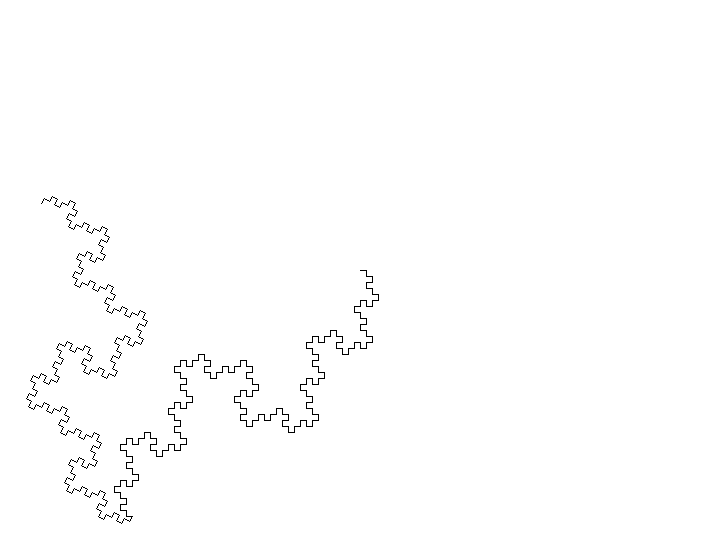

In [36]:
image